<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW2/03_04_mnist_rnn_adv_hierachical_7_kyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **실습 3-4 : MNIST RNN Hierachical model** 


## **Import Module**

In [0]:
%tensorflow_version 2.x 
import tensorflow as tf
import matplotlib.pyplot as plt

import tensorflow.keras as keras
from tensorflow.keras import layers, datasets, models, utils

tf.__version__

'2.0.0'

## **DataSet**

### Load

In [0]:
# The data, split between train and test sets.
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

### Preprocessing

In [0]:
# Reshapes data to 4D for Hierarchical RNN.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train/255.
x_test = x_test/255.

print('x_train shape:', x_train.shape)

x_train shape: (60000, 28, 28, 1)


In [0]:
row, col, pixel = x_train.shape[1:] #(60000, 28, 28, 1)

y_train.shape, y_test.shape, x_train.shape, row, col, pixel

((60000,), (10000,), (60000, 28, 28, 1), 28, 28, 1)

## **Model**

### Define

In [0]:
num_classes = 10
# Embedding dimensions.
row_hidden = 50
col_hidden = 30

def model_function():
  ## Functional API
  # 4D input.
  x = layers.Input(shape=(row, col, pixel))                   # (28,28,1)

  # Encodes a row of pixels using TimeDistributed Wrapper.
  encoded_row = layers.TimeDistributed(
                            layers.LSTM(row_hidden))(x)       # (?,28,50)<-(?,28,28,1)

  # Encodes columns of encoded rows.
  encoded_col = layers.LSTM(col_hidden,
                            name='encode_col')(encoded_row)   # (?,30)<-(?,28,50)

  # Dense layer                                        
  prediction = layers.Dense(num_classes, 
                            activation='softmax')(encoded_col) # (?,10)<-(?,30)
                                                        
  # return model
  return models.Model(x, prediction)

### Compile

In [0]:
model = model_function()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 28, 50)            10400     
_________________________________________________________________
encode_col (LSTM)            (None, 30)                9720      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                310       
Total params: 20,430
Trainable params: 20,430
Non-trainable params: 0
_________________________________________________________________


### Fit

Epoch 30/30  
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0553 - accuracy: 0.9831 - val_loss: 0.1301 - val_accuracy: 0.9574  
CPU times: user 1min 22s, sys: 25.4 s, total: 1min 48s  
Wall time: 2min 3s

In [0]:
%%time
epochs = 30
batch_size = 512

history = model.fit(x_train, y_train,
                    batch_size=batch_size,     
                    epochs=epochs,             
                    validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 10s 174us/sample - loss: 1.8374 - accuracy: 0.3468 - val_loss: 1.4269 - val_accuracy: 0.4896
Epoch 2/30
60000/60000 [==============================] - 4s 64us/sample - loss: 1.0990 - accuracy: 0.6259 - val_loss: 0.9116 - val_accuracy: 0.6819
Epoch 3/30
60000/60000 [==============================] - 4s 65us/sample - loss: 0.7984 - accuracy: 0.7251 - val_loss: 0.8200 - val_accuracy: 0.7124
Epoch 4/30
60000/60000 [==============================] - 4s 64us/sample - loss: 0.6576 - accuracy: 0.7801 - val_loss: 0.5649 - val_accuracy: 0.8145
Epoch 5/30
60000/60000 [==============================] - 4s 64us/sample - loss: 0.5598 - accuracy: 0.8169 - val_loss: 0.6003 - val_accuracy: 0.7936
Epoch 6/30
60000/60000 [==============================] - 4s 64us/sample - loss: 0.4787 - accuracy: 0.8462 - val_loss: 0.4847 - val_accuracy: 0.8435
Epoch 7/30
60000/60000 [==============================

### Evaluate

In [0]:
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.09353901843577624
Test accuracy: 0.9705


## **Analysis**

### Plot

Text(0.5, 1.0, 'Loss')

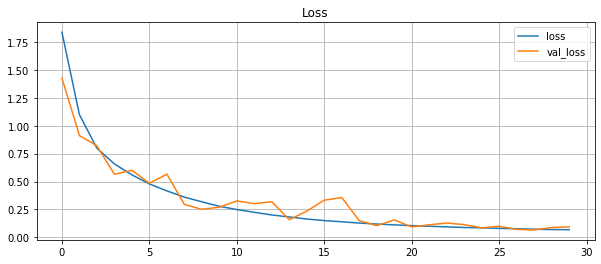

In [0]:
losses = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10, 4))
plt.plot(losses, label='loss')
plt.plot(val_loss, label='val_loss')
plt.grid(True)
plt.legend(loc='best')
plt.title("Loss")

## ***실습 과제***

#### 과제 1. 없음!!
